# Second derivative - 1D heat conduction

## 1D Heat Condution

Given: The physics of the situation is governed by the differential equation of _pure diffusion_:

$$
\dfrac{\mathrm{d}^2 T\left(x\right)}
{\mathrm{d}x^2}=
0
$$

subject to the

- Initial condition: $T\left(x\right)=0$ for $x < 1$.
- Boundary conditions: $T\left(0\right)=0$, $T\left(1\right)=1$.

Objective: To calculate the temperature distribution, $T\left(x\right)$ at equilibrium.

## Finite Difference Solution

1. Convert physical geometry into a computational mesh.
2. Discretize the governing equation on this mesh using a numerical scheme.

$$
\dfrac{\mathrm{d}^2 T\left(t, x\right)}
{\mathrm{d}x^2}\approx
\dfrac{T_{i+1}-2T_i+T_{i-1}}{{\left(\Delta x\right)}^{2}}=
0.
\implies
T^{\left(k+1\right)}_{i}\approx
\dfrac{1}{2}
\left(T^{\left(k\right)}_{i+1}+T^{\left(k\right)}_{i-1}\right).
$$

In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def pure_diffusion_solver(
    number_samples: int = 51, tolerance: float = 1e-8, max_iterations: float = 78000
) -> tuple[int, float, np.array]:
    x = np.linspace(start=0, stop=1, num=number_samples)
    iteration = 0
    numeric_error = 1.0
    T = np.zeros_like(x)
    T[-1] = 1  # Initial condition
    T_new = T.copy()

    while (numeric_error > tolerance) and (iteration < max_iterations):
        T_new[1:-1] = 0.5 * (T[2:] + T[:-2])
        numeric_error = np.sum(np.abs(T_new - T))
        iteration += 1
        T = T_new.copy()

    return iteration, numeric_error, T

In [3]:
def mesh_plot(number_samples: int = 51):
    x = np.linspace(start=0, stop=1, num=number_samples)
    y = np.zeros_like(x)

    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    ax.scatter(x=x, y=y, s=4)
    ax.set_title(f"{number_samples} mesh points")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False);

In [4]:
def pure_diffusion_plot(number_samples: int = 51):
    iteration, numeric_error, T = pure_diffusion_solver(number_samples=number_samples)
    x = np.linspace(start=0, stop=1, num=number_samples)

    fig, ax = plt.subplots()
    ax.plot(x, T, "go--", linewidth=1, markersize=4)
    ax.set_xlabel("Position", fontsize=12)
    ax.set_ylabel("Temperature", fontsize=12)
    ax.grid()
    ax.set_title(
        f"Temperature distribution $T(x)$ at iteration {iteration}, error {numeric_error}",
        fontsize=12,
    );

In [5]:
def heat_plot(number_samples: int = 51):
    iteration, numeric_error, T = pure_diffusion_solver(number_samples=number_samples)

    fig, ax = plt.subplots()
    ax.imshow(T[np.newaxis], vmin=T.min(), vmax=T.max(), cmap="Reds")
    ax.axes.get_yaxis().set_visible(False);

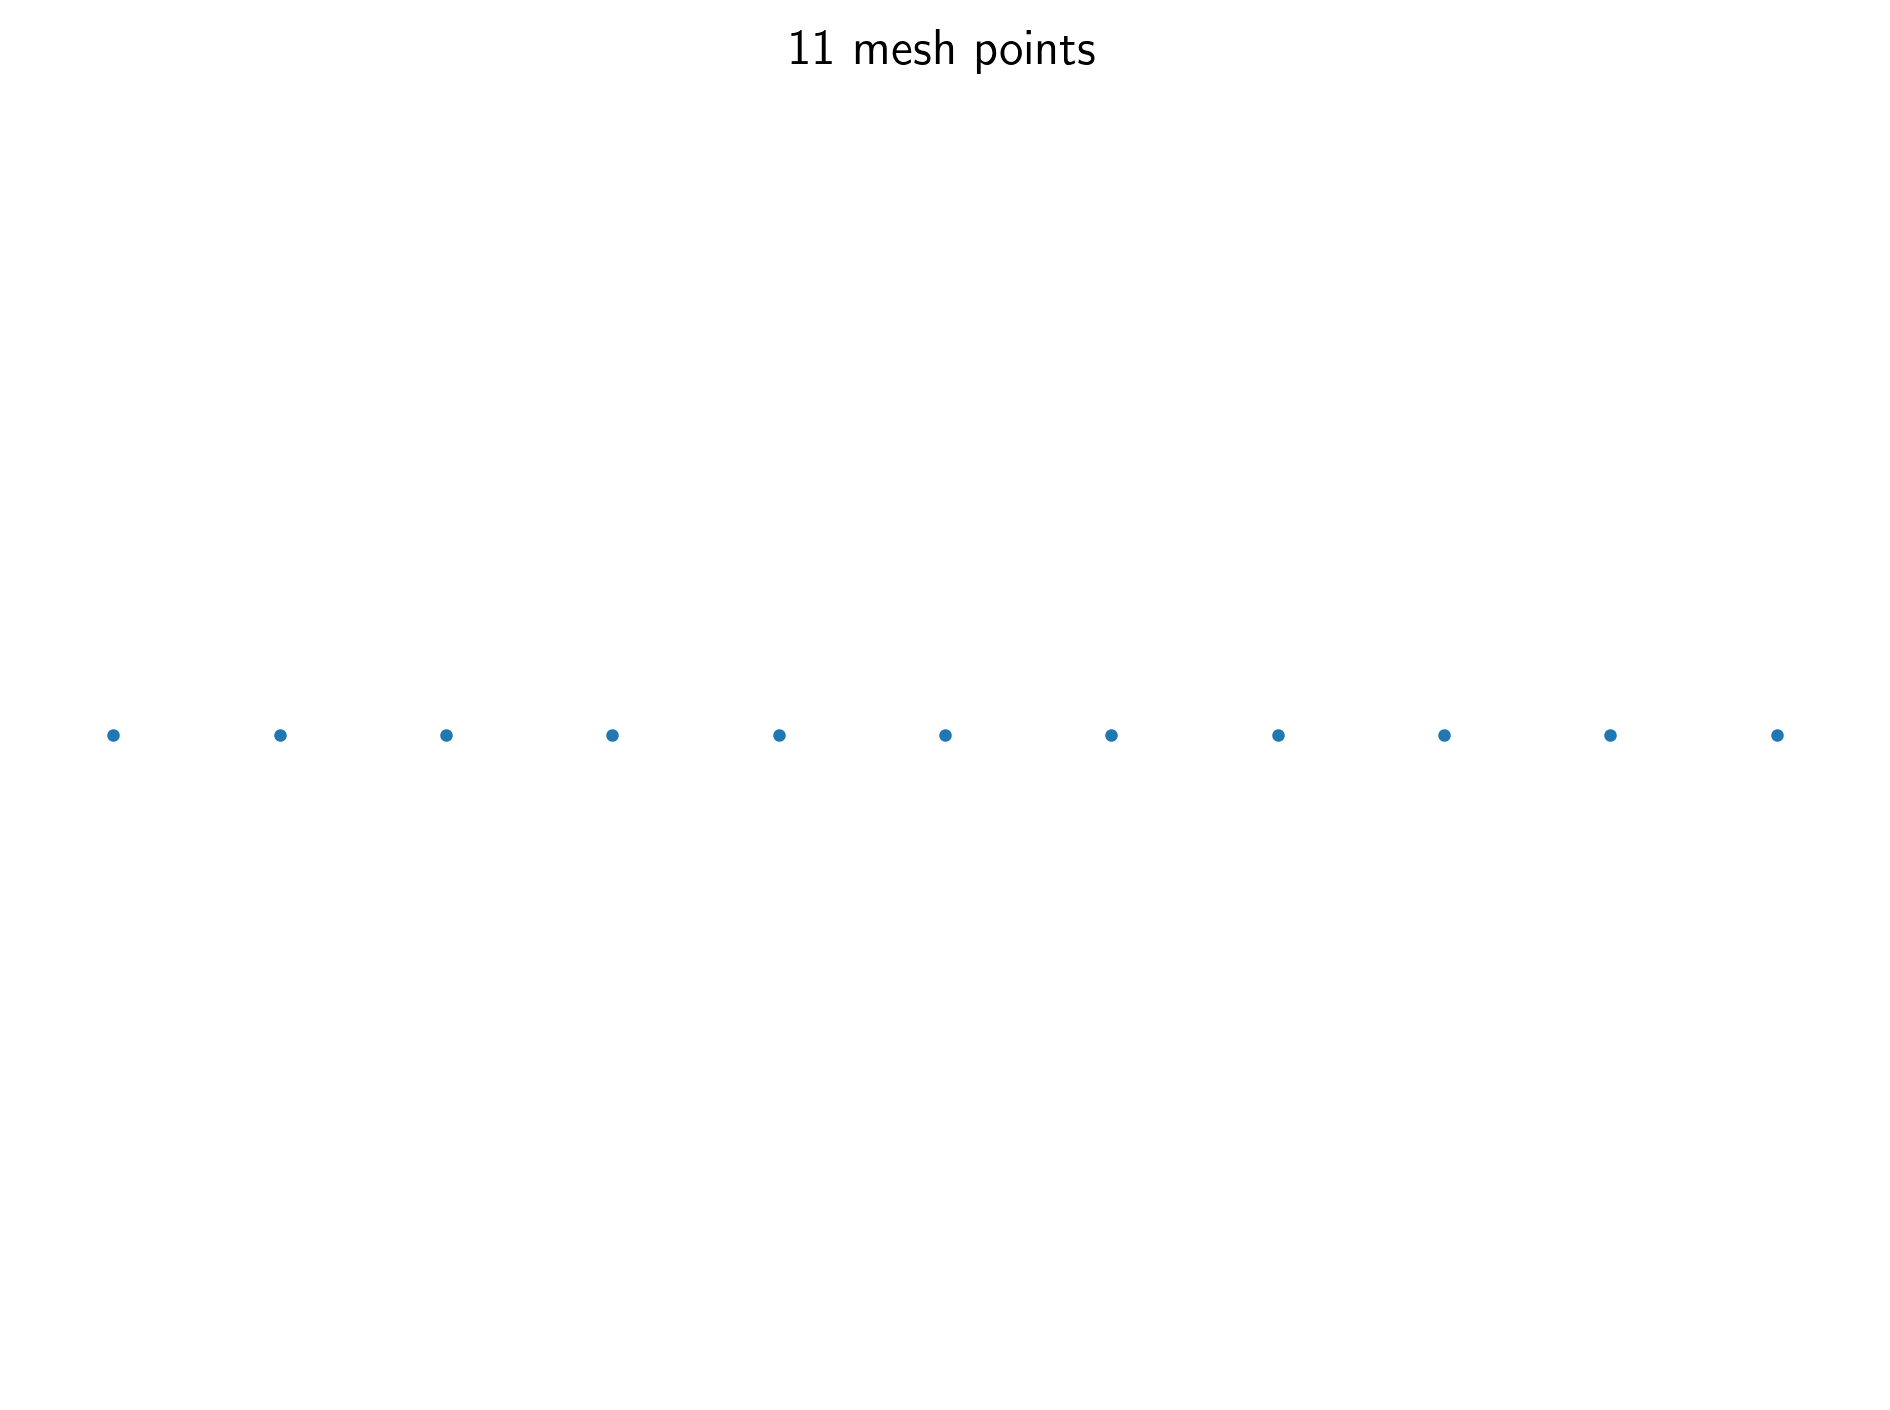

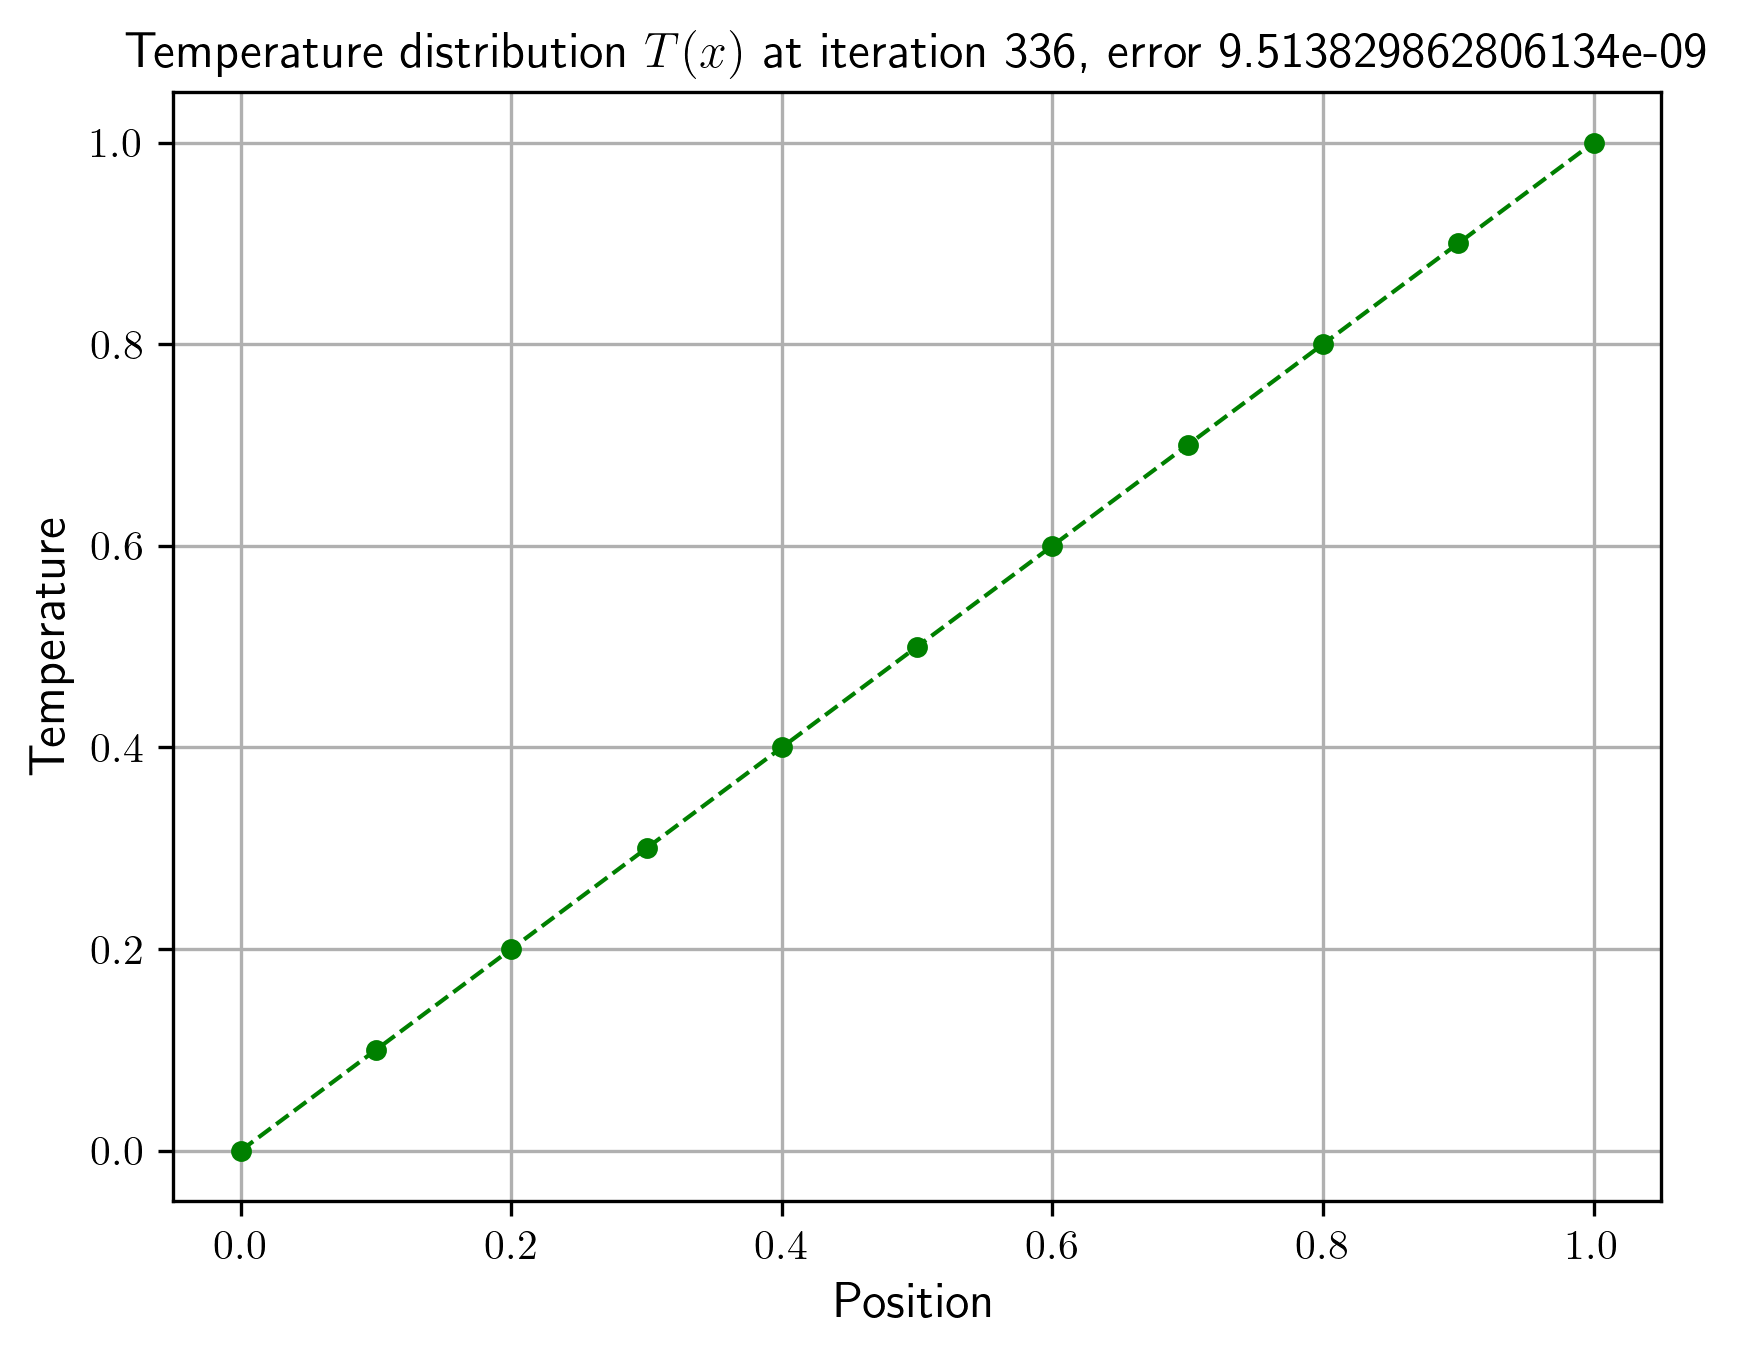

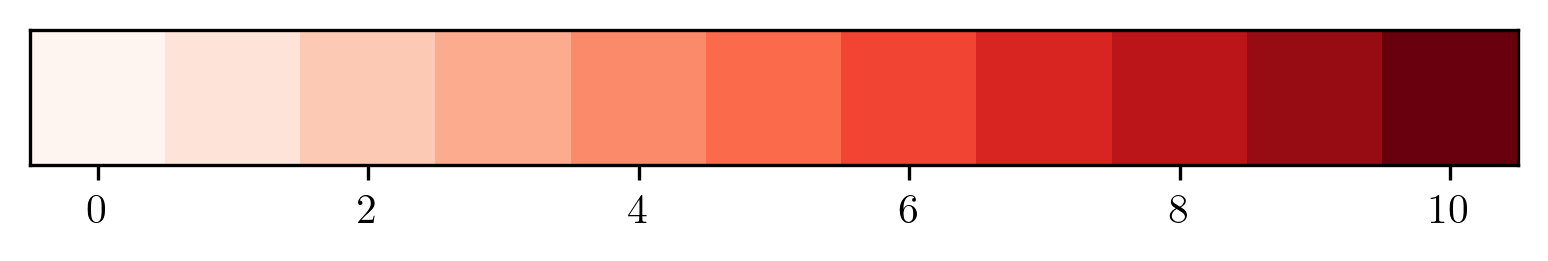

In [6]:
number_samples = 11
mesh_plot(number_samples=number_samples)
pure_diffusion_plot(number_samples=number_samples)
heat_plot(number_samples=number_samples)

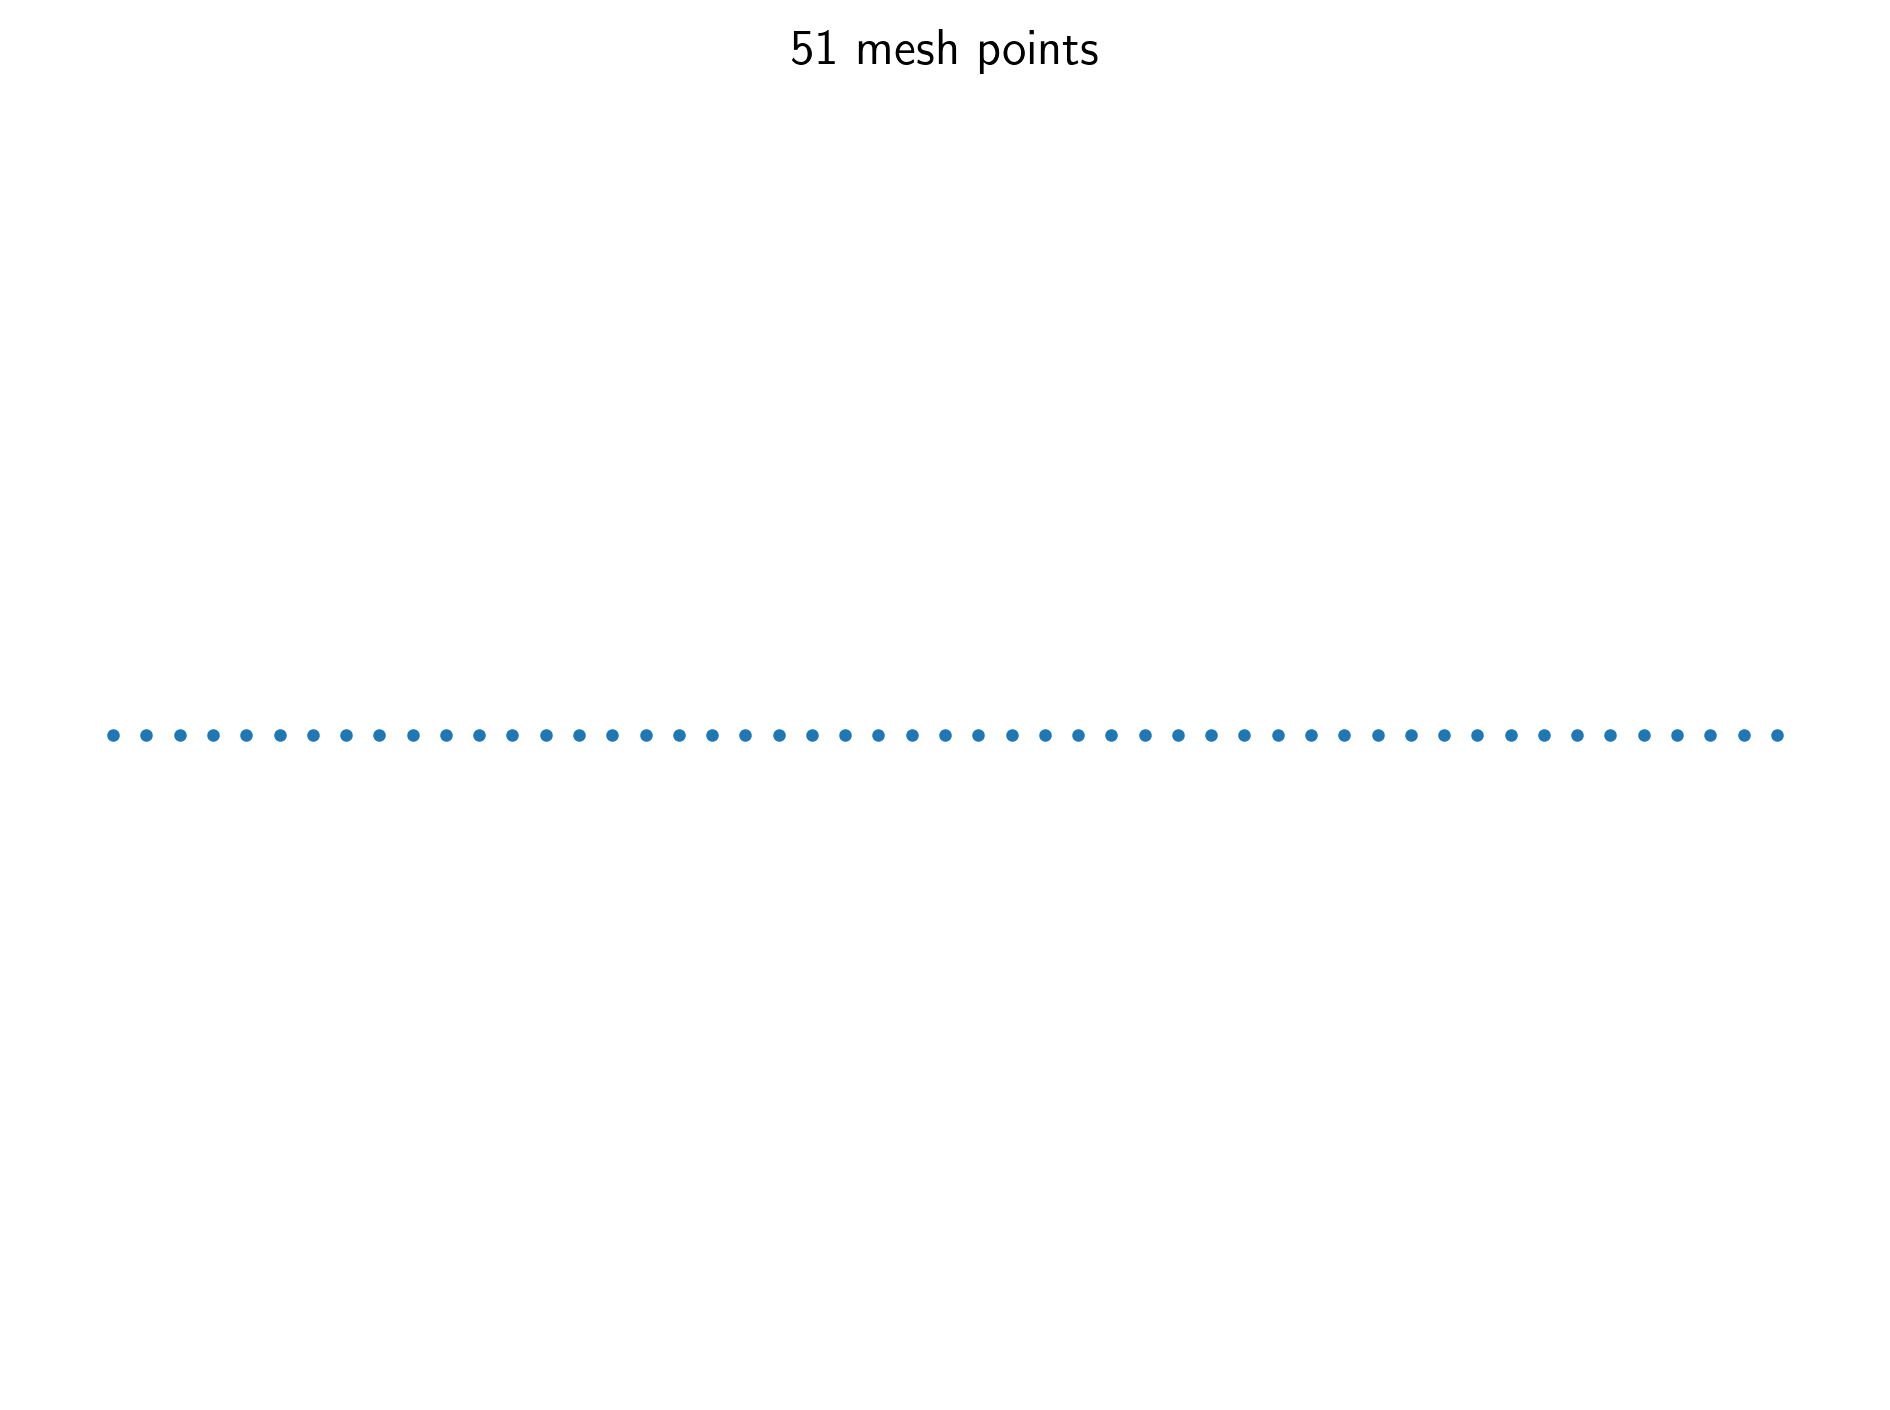

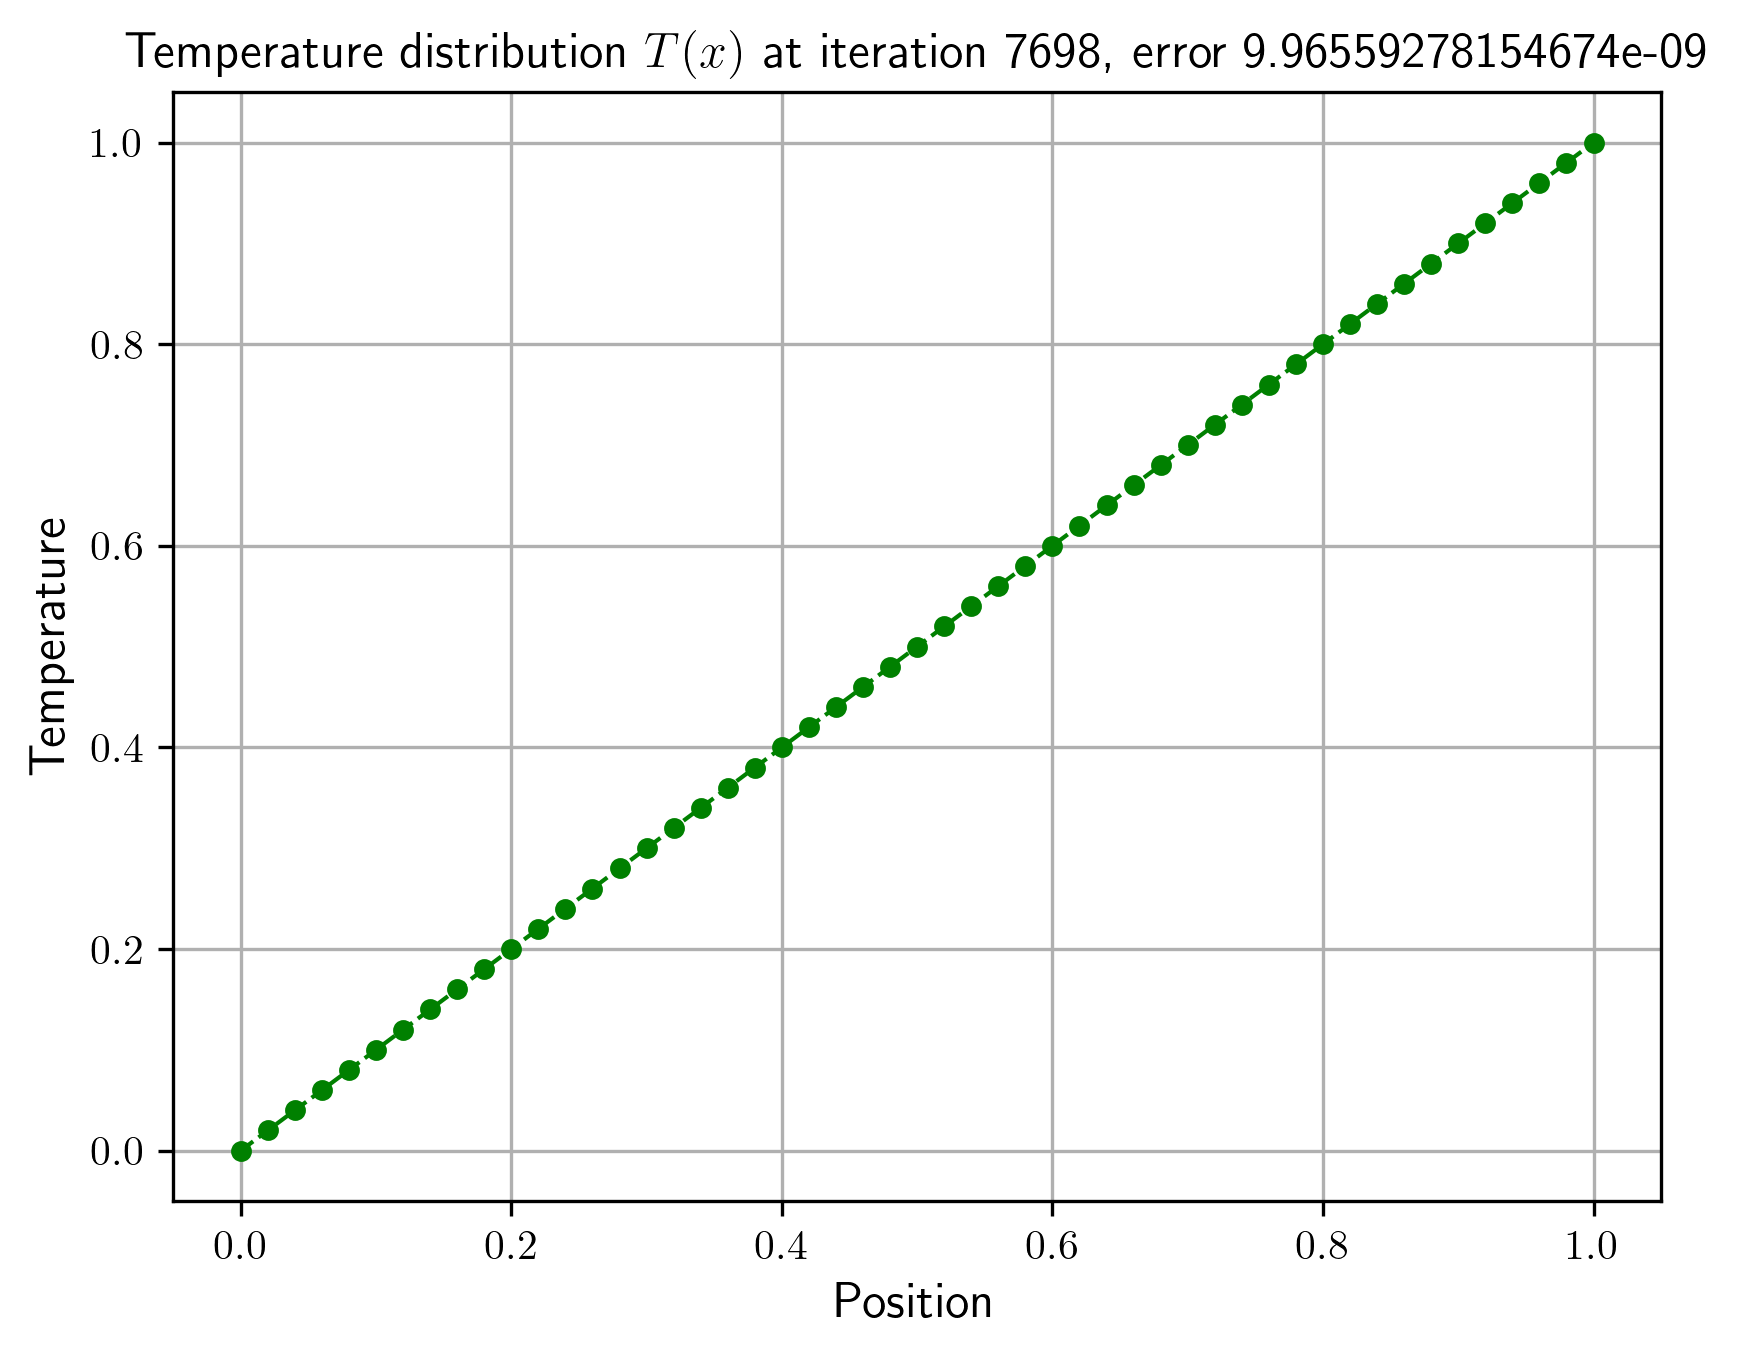

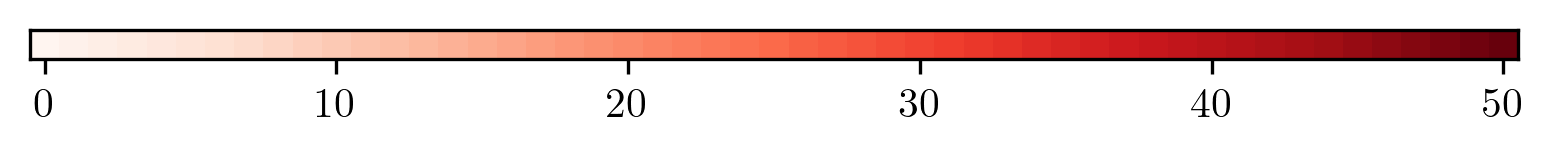

In [7]:
mesh_plot()
pure_diffusion_plot()
heat_plot()

## 1D convection diffusion equation

### Discretization exercise

$$
U\left(x\right)
\dfrac{\mathrm{d}T\left(x\right)}{\mathrm{d}x}+
\dfrac{\mathrm{d}^{2}T\left(x\right)}{\mathrm{d}x^{2}}
=0.
$$

Use a central difference based discretization for both the derivatives:

$$
T^{\left(k+1\right)}_{i}=
\left(\dfrac{1}{2}+\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i+1}+
\left(\dfrac{1}{2}-\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i-1}.
$$

In [8]:
def advection_solver(
    number_samples: int = 11, tolerance: float = 1e-8, max_iterations: float = 300
) -> tuple[int, float, np.array]:
    x, dx = np.linspace(start=0, stop=1, num=number_samples, retstep=True)
    U = 1  # speed
    iteration = 0
    numeric_error = 1.0
    T = np.zeros_like(x)
    T[-1] = 1  # Initial condition
    L, R = (0.5 + U * dx / 4), (0.5 - U * dx / 4)
    T_new = T.copy()

    while (numeric_error > tolerance) and (iteration < max_iterations):
        T_new[1:-1] = L * T[2:] + R * T[:-2]
        numeric_error = np.sum(np.abs(T_new - T))
        iteration += 1
        T = T_new.copy()

    return iteration, numeric_error, T

In [9]:
def advection_plot(number_samples: int = 11):
    iteration, numeric_error, T = advection_solver(number_samples=number_samples)
    x = np.linspace(start=0, stop=1, num=number_samples)

    fig, ax = plt.subplots()
    ax.plot(x, T, "go--", linewidth=1, markersize=4)
    ax.set_xlabel("Position", fontsize=12)
    ax.set_ylabel("Temperature", fontsize=12)
    ax.grid()
    ax.set_title(
        f"Temperature distribution $T(x)$ at iteration {iteration}, error {numeric_error}",
        fontsize=12,
    );

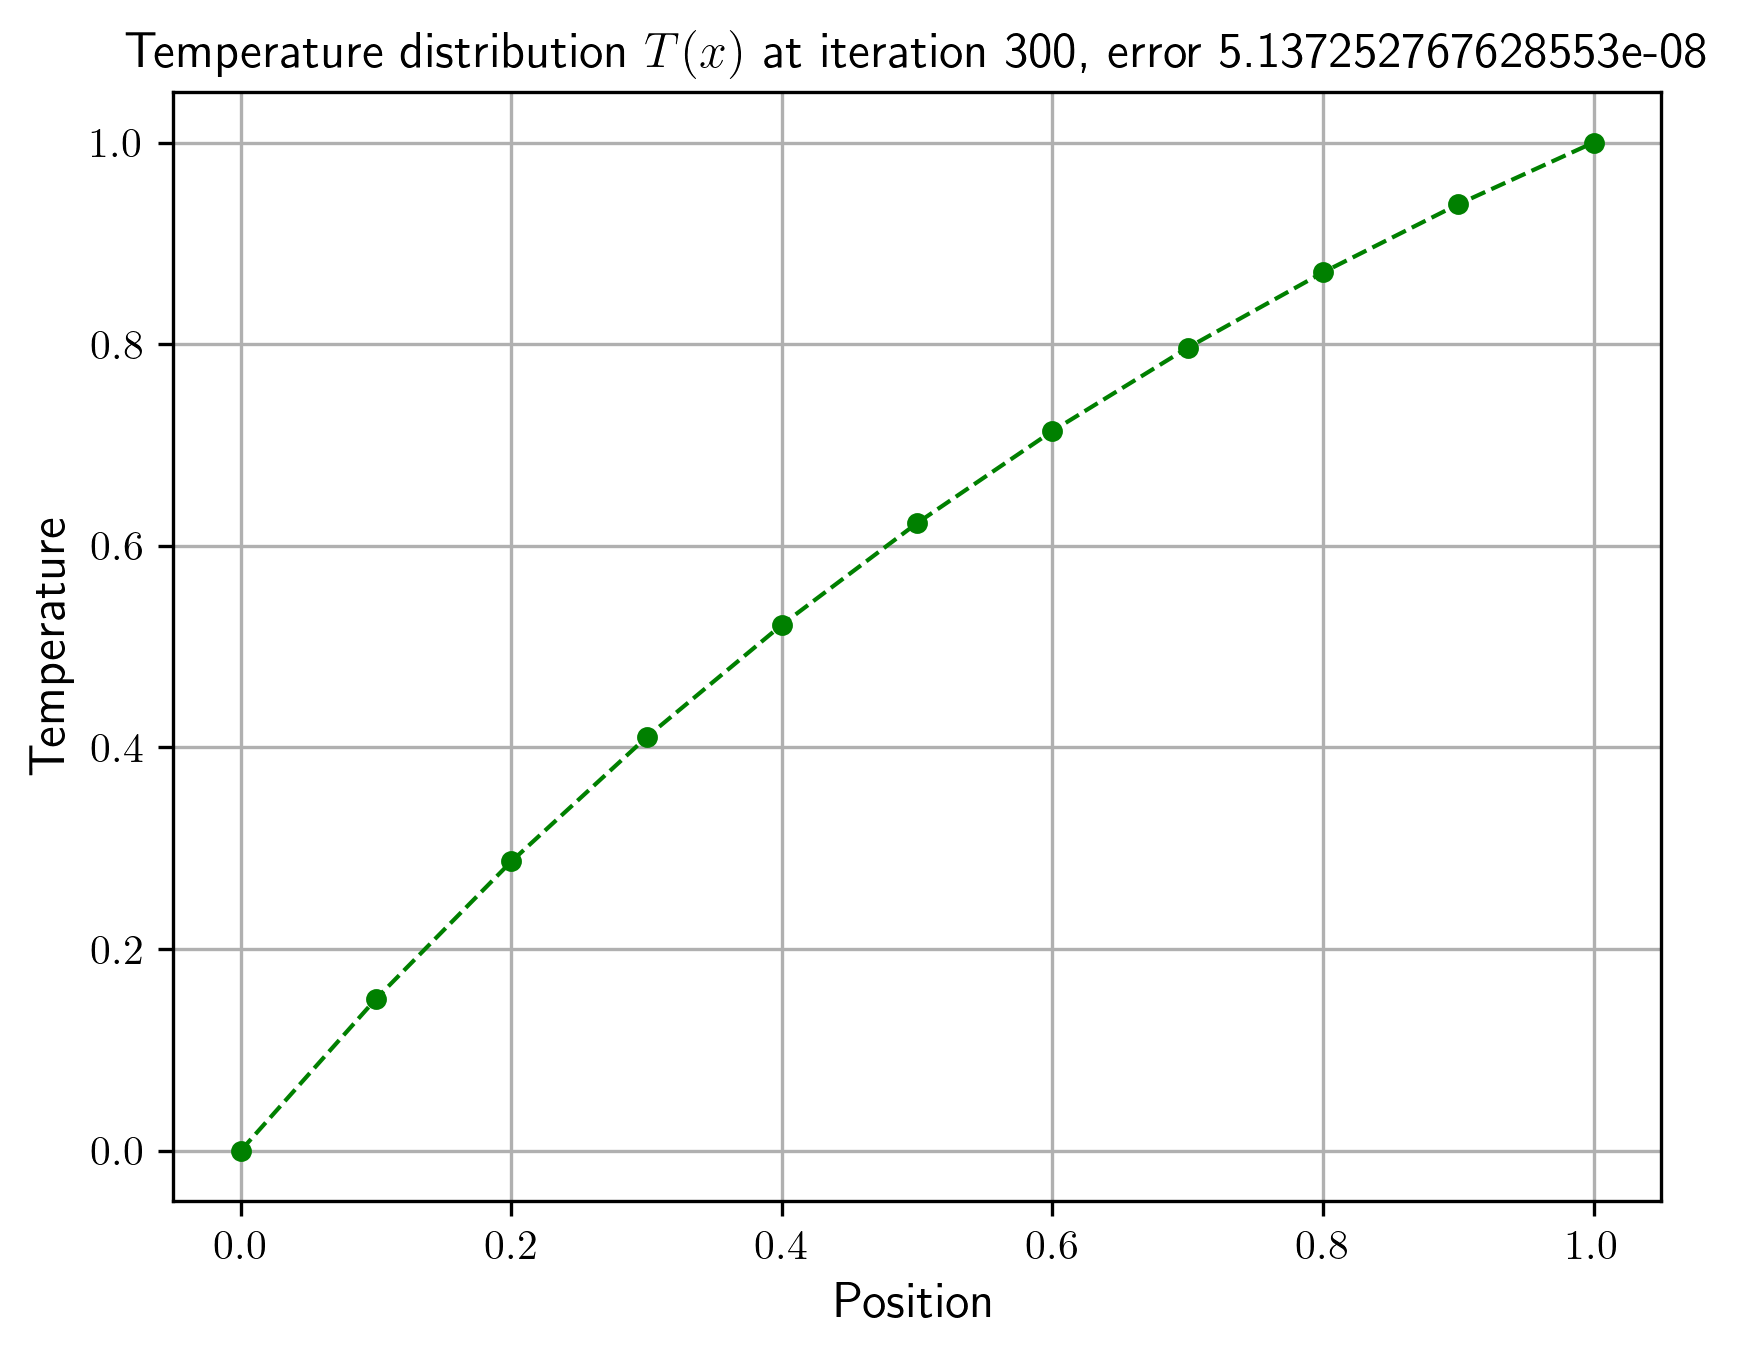

In [10]:
advection_plot()